In [9]:
import pandas as pd 

In [10]:
traffic_crashes_vehicles = pd.read_csv('C:/Users/Tony/Desktop/الفصل الثاني/DM/HM1/Data_mining_project/data/traffic-crashes-vehicles.csv')

C:\Users\Tony\AppData\Local\Temp\ipykernel_9220\1173292068.py:1: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_crashes_vehicles = pd.read_csv('C:/Users/Tony/Desktop/الفصل الثاني/DM/HM1/Data_mining_project/data/traffic-crashes-vehicles.csv')


In [11]:
correlation_matrix = traffic_crashes_vehicles.corr()

ValueError: could not convert string to float: '7b1763088507f77e0e552c009a6bf89a4d6330c75277067fe4c9c8081d86be3db49c1f283c6bcf64b690e03175db497c49aaa3456b5e3c858b3e013dabc1228e'

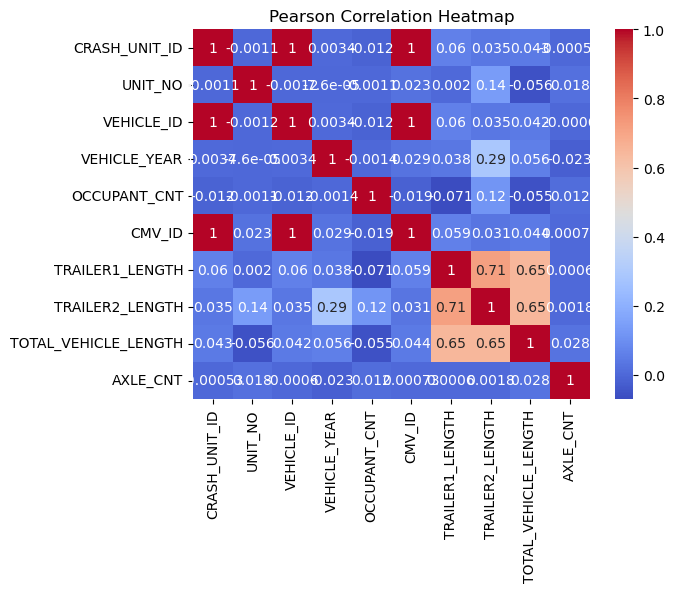

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
columns_to_drop =['CMRC_VEH_I','TOWED_I','FIRE_I','EXCEED_SPEED_LIMIT_I','TOWED_BY',
                  'TOWED_TO','CMV_ID','USDOT_NO','CCMC_NO','ILCC_NO','COMMERCIAL_SRC',
                  'GVWR','CARRIER_NAME','CARRIER_STATE','CARRIER_CITY','HAZMAT_PLACARDS_I',
                  'HAZMAT_NAME','HAZMAT_REPORT_NO','MCS_REPORT_I','MCS_REPORT_NO',
                  'HAZMAT_VIO_CAUSE_CRASH_I','MCS_VIO_CAUSE_CRASH_I','IDOT_PERMIT_NO',
                  'WIDE_LOAD_I','TRAILER1_WIDTH','TRAILER2_WIDTH','TRAILER1_LENGTH',
                  'TRAILER2_LENGTH','TOTAL_VEHICLE_LENGTH','AXLE_CNT','VEHICLE_CONFIG',
                  'CARGO_BODY_TYPE','LOAD_TYPE','HAZMAT_OUT_OF_SERVICE_I',
                  'MCS_OUT_OF_SERVICE_I','HAZMAT_CLASS','UN_NO','HAZMAT_PRESENT_I',
                  'HAZMAT_REPORT_I']
traffic_crashes_vehicles.drop(columns_to_drop,axis=1,inplace=True)

In [ ]:
def checkValues(column):
    uniqueCategories = traffic_crashes_vehicles[column].unique()
    nullCount= traffic_crashes_vehicles[column].isnull().sum()
    print('unique Categories: ',uniqueCategories,'\nnull count: ', nullCount)
    print('Mode:\n',traffic_crashes_vehicles[column].value_counts())
    return traffic_crashes_vehicles[column].mode()[0]


In [ ]:
mode1 = traffic_crashes_vehicles['MAKE'].mode()[0]
mode2 = traffic_crashes_vehicles['MODEL'].mode()[0]
print(mode1,'\n',mode2)
cars = traffic_crashes_vehicles.filter(items=['MAKE','MODEL']).copy()
cheveCars = cars[(cars['MAKE']=='CHEVROLET')]
mode3 = cheveCars['MODEL'].mode()[0]
print(mode3)
traffic_crashes_vehicles['MODEL'].fillna(mode3,inplace=True)

CHEVROLET 
 UNKNOWN


In [ ]:
uniqueCategoriesUnitType = checkValues('UNIT_TYPE')
traffic_crashes_vehicles['UNIT_TYPE'].fillna(uniqueCategoriesUnitType,inplace=True)

unique Categories:  ['DRIVER' 'PEDESTRIAN' 'PARKED' 'BICYCLE' nan 'DRIVERLESS'
 'NON-CONTACT VEHICLE' 'NON-MOTOR VEHICLE' 'DISABLED VEHICLE' 'EQUESTRIAN'] 
null count:  2150
Mode:
 DRIVER                 1407381
PARKED                  221654
PEDESTRIAN               21142
DRIVERLESS               13803
BICYCLE                  12725
NON-MOTOR VEHICLE         1474
NON-CONTACT VEHICLE        306
DISABLED VEHICLE           250
EQUESTRIAN                   7
Name: UNIT_TYPE, dtype: int64


In [ ]:
uniqueCategoriesMake = checkValues('MAKE')
traffic_crashes_vehicles['MAKE'].fillna(uniqueCategoriesMake,inplace=True)

unique Categories:  ['NISSAN' 'CHRYSLER' 'SUBARU' ... 'DWS STOREWAY TRAILER, CROSSVILLE, TN'
 'ONEIDA COACH MANUFACTURING (GRAND LEDGE, MI)'
 'HATFIELD WELDING & TRAILER SALES, INC. MT.PLEASANT'] 
null count:  38478
Mode:
 CHEVROLET                                             190651
UNKNOWN                                               164018
FORD                                                  163720
NISSAN                                                133201
HONDA                                                 120429
                                                       ...  
CENTREVILLE TRAILER                                        1
LINDE                                                      1
MCN MOBILE HOMES CORPORATION                               1
DELTA HOMES CORPORATION                                    1
HATFIELD WELDING & TRAILER SALES, INC. MT.PLEASANT         1
Name: MAKE, Length: 1334, dtype: int64


In [ ]:
uniqueCategoriesLPS = checkValues('LIC_PLATE_STATE')
traffic_crashes_vehicles['LIC_PLATE_STATE'].fillna(uniqueCategoriesLPS,inplace=True)

unique Categories:  ['IL' 'OK' nan 'IN' 'AZ' 'KS' 'XX' 'WI' 'FL' 'WA' 'MN' 'IA' 'CO' 'TX' 'MI'
 'LA' 'OH' 'AR' 'MT' 'NJ' 'MO' 'NV' 'GA' 'PA' 'VA' 'MS' 'MD' 'KY' 'NY'
 'UT' 'OR' 'ND' 'VT' 'CA' 'ID' 'WV' 'AL' 'NB' 'DC' 'NC' 'ME' 'MA' 'TN'
 'SC' 'WY' 'RI' 'CT' 'NM' 'HI' 'AK' 'SD' 'NH' 'DE'] 
null count:  188917
Mode:
 IL    1366818
IN      30002
XX      29832
WI       9542
MI       6444
FL       5971
TX       4722
OH       3901
AZ       3417
MN       2796
IA       2704
CA       2512
MO       2506
TN       2273
GA       1938
OK       1386
PA       1194
NY       1159
VA        977
KY        973
NC        914
NJ        892
CO        801
MS        748
MD        664
AL        641
NB        617
WA        582
KS        563
LA        499
MA        494
AR        480
SC        379
ME        339
NV        275
OR        264
CT        242
UT        214
SD        172
MT        172
NM        147
ID        146
ND        126
WV        101
NH         76
RI         72
DE         67
DC         64
VT         

In [ ]:
year = checkValues('VEHICLE_YEAR')
traffic_crashes_vehicles['VEHICLE_YEAR'].fillna(year,inplace=True)

unique Categories:  [2009. 2010. 2015. 2018. 2019. 2023. 2013. 2008. 2017. 2020. 2016. 2012.
 2014. 2007. 2022. 2004. 2002.   nan 2021. 2005. 2006. 2011. 2024. 2001.
 1999. 2003. 1997. 8001. 2000. 1995. 1998. 1996. 1980. 1990. 1991. 1994.
 1987. 1985. 1992. 2111. 1993. 2107. 1983. 1966. 9999. 2105. 1900. 1981.
 2204. 1988. 1989. 1901. 2207. 1986. 1978. 1979. 2108. 2099. 2918. 2919.
 2088. 2205. 1977. 1953. 9418. 1971. 1976. 1984. 2025. 1975. 1973. 2112.
 1939. 2103. 1982. 8609. 2203. 2054. 2118. 2910. 9900. 1961. 2916. 2110.
 2029. 1972. 2033. 2912. 1974. 2914. 2102. 2106. 2121. 2104. 1963. 2066.
 1954. 7372. 1969. 2209. 1970. 1929. 2079. 1964. 3013. 1967. 3011. 2412.
 2929. 2208. 2115. 2028. 2140. 2998. 2206. 2201. 1960. 2100. 2228. 3019.
 2030. 2109. 1968. 1955. 2055. 1965. 2202. 3017. 2915. 3001. 2026. 2113.
 2049. 5015. 2077. 2116. 3022. 6016. 2222. 8007. 2091. 3029. 2051. 8324.
 2212. 5383. 2913. 2616. 2031. 2220. 2349. 2210. 2917. 2047. 2920. 2211.
 2048. 2032. 3009. 1957. 5005. 

In [ ]:
uniqueCategoriesVDefect = checkValues('VEHICLE_DEFECT')
traffic_crashes_vehicles['VEHICLE_DEFECT'].fillna(uniqueCategoriesVDefect,inplace=True)

unique Categories:  ['UNKNOWN' 'NONE' 'OTHER' nan 'BRAKES' 'TIRES' 'STEERING' 'ENGINE/MOTOR'
 'WHEELS' 'SUSPENSION' 'CARGO' 'FUEL SYSTEM' 'SIGNALS' 'LIGHTS'
 'TRAILER COUPLING' 'WINDOWS' 'RESTRAINT SYSTEM' 'EXHAUST'] 
null count:  38473
Mode:
 NONE                888141
UNKNOWN             736724
OTHER                 9318
BRAKES                5155
TIRES                  830
STEERING               746
WHEELS                 418
SUSPENSION             268
FUEL SYSTEM            233
ENGINE/MOTOR           210
WINDOWS                109
LIGHTS                 101
CARGO                   57
SIGNALS                 42
RESTRAINT SYSTEM        25
TRAILER COUPLING        23
EXHAUST                 19
Name: VEHICLE_DEFECT, dtype: int64


In [ ]:
Vtype = checkValues('VEHICLE_TYPE')
traffic_crashes_vehicles['VEHICLE_TYPE'].fillna(Vtype, inplace=True)

unique Categories:  ['UNKNOWN/NA' 'PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'VAN/MINI-VAN' nan
 'TRUCK - SINGLE UNIT' 'BUS OVER 15 PASS.' 'PICKUP' 'OTHER'
 'TRACTOR W/ SEMI-TRAILER' 'SINGLE UNIT TRUCK WITH TRAILER'
 'TRACTOR W/O SEMI-TRAILER' 'OTHER VEHICLE WITH TRAILER'
 'BUS UP TO 15 PASS.' 'MOTORCYCLE (OVER 150CC)' 'AUTOCYCLE'
 'MOPED OR MOTORIZED BICYCLE' 'FARM EQUIPMENT'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'ALL-TERRAIN VEHICLE (ATV)'
 'SNOWMOBILE' '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' 'MOTOR DRIVEN CYCLE'] 
null count:  38473
Mode:
 PASSENGER                                 1033026
SPORT UTILITY VEHICLE (SUV)                225304
UNKNOWN/NA                                 151957
VAN/MINI-VAN                                77925
PICKUP                                      52994
TRUCK - SINGLE UNIT                         30880
OTHER                                       19805
BUS OVER 15 PASS.                           17603
TRACTOR W/ SEMI-TRAILER                     15590

In [ ]:
Vuse = checkValues('VEHICLE_USE')
traffic_crashes_vehicles['VEHICLE_USE'].fillna(Vuse,inplace=True)

unique Categories:  ['UNKNOWN/NA' 'PERSONAL' 'AMBULANCE' nan 'OTHER' 'CTA' 'NOT IN USE'
 'TOW TRUCK' 'TAXI/FOR HIRE' 'POLICE' 'CONSTRUCTION/MAINTENANCE' 'FIRE'
 'MASS TRANSIT' 'RIDESHARE SERVICE' 'COMMERCIAL - SINGLE UNIT'
 'DRIVER EDUCATION' 'OTHER TRANSIT' 'LAWN CARE/LANDSCAPING'
 'COMMERCIAL - MULTI-UNIT' 'STATE OWNED' 'SCHOOL BUS'
 'CAMPER/RV - SINGLE UNIT' 'MILITARY' 'AGRICULTURE' 'HOUSE TRAILER'
 'CAMPER/RV - TOWED/MULTI-UNIT'] 
null count:  38473
Mode:
 PERSONAL                        1061418
UNKNOWN/NA                       334426
NOT IN USE                        85030
OTHER                             51724
TAXI/FOR HIRE                     20399
COMMERCIAL - SINGLE UNIT          19868
RIDESHARE SERVICE                 13584
CTA                               11558
POLICE                            10781
CONSTRUCTION/MAINTENANCE           7310
COMMERCIAL - MULTI-UNIT            6631
SCHOOL BUS                         4485
OTHER TRANSIT                      3964
TOW TRUCK      

In [ ]:
travelDirection = checkValues('TRAVEL_DIRECTION')
traffic_crashes_vehicles['TRAVEL_DIRECTION'].fillna(travelDirection,inplace=True)

unique Categories:  ['S' 'W' 'E' 'N' 'UNKNOWN' 'NE' 'SE' nan 'NW' 'SW'] 
null count:  38473
Mode:
 N          385967
S          377796
W          341470
E          335006
UNKNOWN    130851
SE          20902
NW          19175
SW          15830
NE          15422
Name: TRAVEL_DIRECTION, dtype: int64


In [ ]:
maneuver = checkValues('MANEUVER')
traffic_crashes_vehicles['MANEUVER'].fillna(maneuver,inplace=True)

unique Categories:  ['SLOW/STOP IN TRAFFIC' 'PASSING/OVERTAKING' 'TURNING RIGHT'
 'STRAIGHT AHEAD' 'ENTER FROM DRIVE/ALLEY' 'UNKNOWN/NA' 'BACKING'
 'ENTERING TRAFFIC LANE FROM PARKING' nan 'STARTING IN TRAFFIC' 'OTHER'
 'TURNING LEFT' 'CHANGING LANES' 'PARKED' 'SKIDDING/CONTROL LOSS'
 'AVOIDING VEHICLES/OBJECTS' 'MERGING' 'LEAVING TRAFFIC LANE TO PARK'
 'U-TURN' 'PARKED IN TRAFFIC LANE' 'NEGOTIATING A CURVE' 'DRIVERLESS'
 'DRIVING WRONG WAY' 'SLOW/STOP - LOAD/UNLOAD' 'DISABLED' 'TURNING ON RED'
 'DIVERGING' 'SLOW/STOP - LEFT TURN' 'SLOW/STOP - RIGHT TURN'] 
null count:  38473
Mode:
 STRAIGHT AHEAD                        757023
PARKED                                225985
UNKNOWN/NA                            126133
SLOW/STOP IN TRAFFIC                  121440
TURNING LEFT                           97674
BACKING                                66468
TURNING RIGHT                          54413
PASSING/OVERTAKING                     39876
CHANGING LANES                         31480
OTHER

In [ ]:
occnt = checkValues('OCCUPANT_CNT')
traffic_crashes_vehicles['OCCUPANT_CNT'].fillna(occnt,inplace=True)

unique Categories:  [ 1.  2.  3.  4. nan  0.  5.  6. 31.  8.  7. 23. 37. 10.  9. 12. 13. 27.
 19. 11. 35. 25. 20. 18. 15. 26. 16. 17. 28. 22. 36. 33. 44. 14. 43. 32.
 29. 34. 47. 21. 30. 99. 24. 60. 39. 41. 38.] 
null count:  38473
Mode:
 1.0     1189788
0.0      217522
2.0      165846
3.0       43539
4.0       17242
5.0        5670
6.0        1508
7.0         593
8.0         230
9.0         106
11.0         68
10.0         63
12.0         43
13.0         38
15.0         19
14.0         17
16.0         13
20.0         11
18.0         11
19.0         10
17.0          8
28.0          8
26.0          6
21.0          5
25.0          5
29.0          5
36.0          5
44.0          4
33.0          3
30.0          3
22.0          3
27.0          3
35.0          3
43.0          2
41.0          2
31.0          2
34.0          2
47.0          2
23.0          2
99.0          2
39.0          2
60.0          1
37.0          1
24.0          1
32.0          1
38.0          1
Name: OCCUPANT_CNT, dtype

In [ ]:
firstContactPoint = checkValues('FIRST_CONTACT_POINT')
traffic_crashes_vehicles['FIRST_CONTACT_POINT'].fillna(firstContactPoint, inplace=True)

unique Categories:  ['FRONT' 'REAR-RIGHT-CORNER' 'SIDE-LEFT-FRONT' 'FRONT-LEFT-CORNER'
 'FRONT-RIGHT-CORNER' 'SIDE-RIGHT-FRONT' 'UNKNOWN' 'REAR' 'SIDE-LEFT-REAR'
 'SIDE-RIGHT-REAR' 'REAR-LEFT-CORNER' 'SIDE-LEFT' nan 'SIDE-RIGHT' 'NONE'
 'OTHER' 'TOTAL (ALL AREAS)' 'FRONT-RIGHT' 'REAR-LEFT' 'FRONT-LEFT'
 'REAR-RIGHT' 'UNDER CARRIAGE' 'TOP' 'ROOF'] 
null count:  41596
Mode:
 FRONT                 322092
REAR                  216861
UNKNOWN               156449
SIDE-LEFT             112415
SIDE-RIGHT            106890
FRONT-LEFT-CORNER     103060
FRONT-RIGHT-CORNER    100919
FRONT-LEFT             81524
FRONT-RIGHT            76903
REAR-LEFT              68088
REAR-LEFT-CORNER       45848
OTHER                  40952
REAR-RIGHT             36488
REAR-RIGHT-CORNER      33455
TOTAL (ALL AREAS)      27438
SIDE-LEFT-REAR         26071
SIDE-RIGHT-REAR        19739
SIDE-LEFT-FRONT        16880
SIDE-RIGHT-FRONT       14516
NONE                   13083
ROOF                   11958
UNDER CARRIAGE 

In [ ]:
num = ['00','01','02','03','04','05','06','07','08','09','10','11','12','99']

for i in num:
    traffic_crashes_vehicles[f'AREA_{i}_I'].fillna('N',inplace=True)
    

In [ ]:
IDs = traffic_crashes_vehicles.filter(items=['CRASH_UNIT_ID','VEHICLE_ID']).copy()

In [ ]:
IDs['CRASH_UNIT_ID'].mean()

898898.2305204618

In [ ]:
IDs['VEHICLE_ID'].mean()

854993.4378602537

In [ ]:
traffic_crashes_vehicles['RSLT'] = traffic_crashes_vehicles['CRASH_UNIT_ID'].sub(traffic_crashes_vehicles['VEHICLE_ID'].mean()).abs().astype(int)

In [ ]:
traffic_crashes_vehicles['VEHICLE_ID'].fillna(traffic_crashes_vehicles['RSLT'],inplace=True)

In [ ]:
traffic_crashes_vehicles['VEHICLE_ID'].astype(int)

0          1634931
1          1634978
2          1634948
3          1637401
4          1637408
            ...   
1680887    1706983
1680888    1706984
1680889    1707226
1680890    1707223
1680891    1710083
Name: VEHICLE_ID, Length: 1680892, dtype: int32